In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

# Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

## Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

## EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


In [3]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

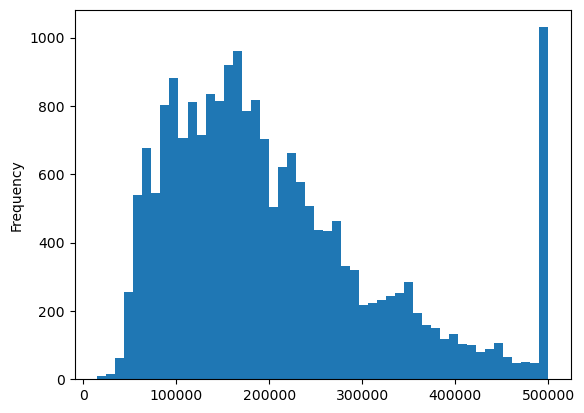

In [5]:

df['median_house_value'].plot(kind='hist', bins=50);

## Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


In [6]:
df_filter = df[(df['ocean_proximity'] == '<1H OCEAN')| (df['ocean_proximity'] == 'INLAND')]


In [7]:
cols =  ['latitude',
        'longitude',
        'housing_median_age', 
        'total_rooms', 
        'total_bedrooms', 
        'population',
        'households', 
        'median_income', 
        'median_house_value']

In [8]:
df_new = df_filter[cols].reset_index(drop=True)

In [9]:
df_new

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0



## Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [10]:
df_new.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Answer Question : 

* `total_bedrooms`  

## Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [11]:
df_new.population.median()

1195.0

### Answer Question 
* `1195`  

## Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [12]:
from sklearn.utils import shuffle

In [13]:
n = len(df[cols])

# get shuffled indexes to split data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# calculate each 20 percentage of dataset for val & test 
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split data
train = df[cols].iloc[idx[:n_train]]
val = df[cols].iloc[idx[n_train:n_train+n_val]]
test = df[cols].iloc[idx[n_train+n_val:]]


In [14]:
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [15]:
y_train = np.log1p(train.median_house_value.values)
y_val = np.log1p(val.median_house_value.values)
y_test = np.log1p(test.median_house_value.values)

In [16]:
train.drop(['median_house_value'], axis=1, inplace=True)
val.drop(['median_house_value'], axis=1, inplace=True)
test.drop(['median_house_value'], axis=1, inplace=True)

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

* `With 0`
* `With mean`
* `Both are equally good`

In [17]:
def train_linear_regression(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    
    XTX += r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
def rmse(y_pred, y):
    squred_error = (y - y_pred)**2
    mse = squred_error.mean()
    
    return np.sqrt(mse)

In [19]:
def prepare_X(df, missing_value):
    df = df.copy()
    df = df.fillna(missing_value)
    X = df.values
    return X

In [20]:
# fill missing values in total_bedrooms feature with 0

X_train = prepare_X(train, 0)
w0, w = train_linear_regression(X_train, y_train, r=0)

X_val = prepare_X(val, 0)
y_val_pred = w0 + X_val.dot(w)
rmse_score = round(rmse(y_val_pred, y_val), 2)
rmse_score

0.33

In [21]:
# fill missing values in total_bedrooms feature with 0

X_train = prepare_X(train, train['total_bedrooms'].mean())
w0, w = train_linear_regression(X_train, y_train, r=0)

X_val = prepare_X(val, val['total_bedrooms'].mean())
y_val_pred = w0 + X_val.dot(w)
rmse_score = round(rmse(y_val_pred, y_val), 2)
rmse_score

0.33

### Answer Question 
* `Both are equally good` 

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

* `0`
* `0.000001`
* `0.001`
* `0.0001`



In [22]:
r_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


for r in r_params:
    X_train = prepare_X(train, 0)
    w0, w = train_linear_regression(X_train, y_train, r=r)

    X_val = prepare_X(val, 0)
    y_val_pred = w0 + X_val.dot(w)
    rmse_score = round(rmse(y_val_pred, y_val),2)
    print(f" r = {r}, w0={round(w0,2)}, rmse = {rmse_score}")

 r = 0, w0=-11.69, rmse = 0.33
 r = 1e-06, w0=-11.69, rmse = 0.33
 r = 0.0001, w0=-11.69, rmse = 0.33
 r = 0.001, w0=-11.67, rmse = 0.33
 r = 0.01, w0=-11.53, rmse = 0.33
 r = 0.1, w0=-10.27, rmse = 0.33
 r = 1, w0=-4.92, rmse = 0.33
 r = 5, w0=-1.48, rmse = 0.34
 r = 10, w0=-0.79, rmse = 0.34


### Answer Question 
* `0.001` 


## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

* `0.5`
* `0.05`
* `0.005`
* `0.0005`

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.




In [23]:
rmse_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:

    n = len(df[cols])

    # get shuffled indexes to split data
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # calculate each 20 percentage of dataset for val & test 
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # split data
    train = df[cols].iloc[idx[:n_train]]
    test = df[cols].iloc[idx[n_train:n_train+n_test]]
    val = df[cols].iloc[idx[n_train+n_test:]]


    # get target columns
    y_train = np.log1p(train['median_house_value'].values)
    y_val = np.log1p(val['median_house_value'].values)
    y_test = np.log1p(test['median_house_value'].values)

    del train['median_house_value']
    del val['median_house_value']
    del test['median_house_value']
    
    
    X_train = prepare_X(train, missing_value=0)
    w0, w = train_linear_regression(X_train, y_train, r=0)

    X_val = prepare_X(val, missing_value=0)
    y_val_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val_pred, y_val)
    print(f"seed = {seed}, rmse = {rmse_score}")
    
    rmse_scores.append(rmse_score)

std = round(np.std(np.array(rmse_scores)), 3)
std

seed = 0, rmse = 0.3375383126870338
seed = 1, rmse = 0.3379506305306756
seed = 2, rmse = 0.3482246862118704
seed = 3, rmse = 0.33699107122475214
seed = 4, rmse = 0.3366639584843802
seed = 5, rmse = 0.3357549567642569
seed = 6, rmse = 0.34251039033484465
seed = 7, rmse = 0.3460651298796053
seed = 8, rmse = 0.34835762061745223
seed = 9, rmse = 0.34569923171766176


0.005

### Answer Question 
* `0.005` 

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

* `0.13`
* `0.23`
* `0.33`
* `0.43`

In [24]:
n = len(df[cols])
seed = 9
    
# get shuffled indexes to split data
idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

# calculate each 20 percentage of dataset for val & test 
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split data
train = df[cols].iloc[idx[:n_train]]
test = df[cols].iloc[idx[n_train:n_train+n_test]]
val = df[cols].iloc[idx[n_train+n_test:]]

# get target columns
y_train = np.log1p(train['median_house_value'].values)
y_val = np.log1p(val['median_house_value'].values)
y_test = np.log1p(test['median_house_value'].values)

del train['median_house_value']
del val['median_house_value']
del test['median_house_value']
    
train_append = pd.concat([train,val])
y_train_append = np.append(y_train, y_val)
    
X_train_append = prepare_X(train_append, missing_value=0)
w0, w = train_linear_regression(X_train_append, y_train_append, r=0.001)

X_test = prepare_X(test, 0)
y_test_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test_pred, y_test)
print(f"rmse = {rmse_score}")
    

rmse = 0.33616780318856515


### Answer Question 
* `0.33` 